In [5]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def get_tps(input_file, output_file):

  # Define the regular expression pattern
  pattern = r"\x1b\[0m\x1b\[38;5;8m\[\x1b\[0m(\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{9})Z \x1b\[0m\x1b\[32mINFO \x1b\[0m solana_bench_tps::perf_utils\x1b\[0m\x1b\[38;5;8m\]\x1b\[0m Sampler  (\d+\.\d{2}) TPS, Transactions:  \d+, Total transactions: \d+ over \d+ s"


  # Open the input file and read its contents
  with open(input_file, "r") as file:
    lines = file.readlines()

  # Initialize lists to store extracted data
  dates = []
  times = []
  tps_values = []

  # Iterate over each line and match the pattern
  for line in lines:
    match = re.search(pattern, line)
    if match:
      date = match.group(1)[:10]
      time = match.group(1)[11:]
      tps = match.group(2)

      dates.append(date)
      times.append(time)
      tps_values.append(tps)

    # Create a DataFrame from the extracted data
    data = {"date": dates, "time": times, "tps": tps_values}
    df = pd.DataFrame(data)

    df.index = df.index + 1

    # Save the DataFrame to a CSV file
    df.to_csv(output_file)  # Include index column

  return df

In [7]:
def print_describe(df):
  # Convert the "tps" column to float
  df["tps"] = df["tps"].astype(float)

  # Now you can use the .describe() function
  print(df["tps"].describe())

Summary Statistics for Sample: df_tps_50
count       59.000000
mean     19240.405254
std       3310.129175
min      11385.440000
25%      17988.080000
50%      20385.540000
75%      21906.860000
max      23601.180000
Name: tps, dtype: float64
Total tx: 1135183
Sampler failed: 0
----------------------------------------
Summary Statistics for Sample: df_tps_500
count       51.000000
mean     23949.460588
std       6361.155589
min      13331.670000
25%      19470.055000
50%      23674.670000
75%      27939.095000
max      41200.850000
Name: tps, dtype: float64
Total tx: 1221422
Sampler failed: 8
----------------------------------------
Summary Statistics for Sample: df_tps_1000
count       42.000000
mean     25946.657381
std       8626.864409
min      11549.980000
25%      17502.895000
50%      27291.485000
75%      32935.750000
max      40923.740000
Name: tps, dtype: float64
Total tx: 1089759
Sampler failed: 17
----------------------------------------
Summary Statistics for Sample: df_tp

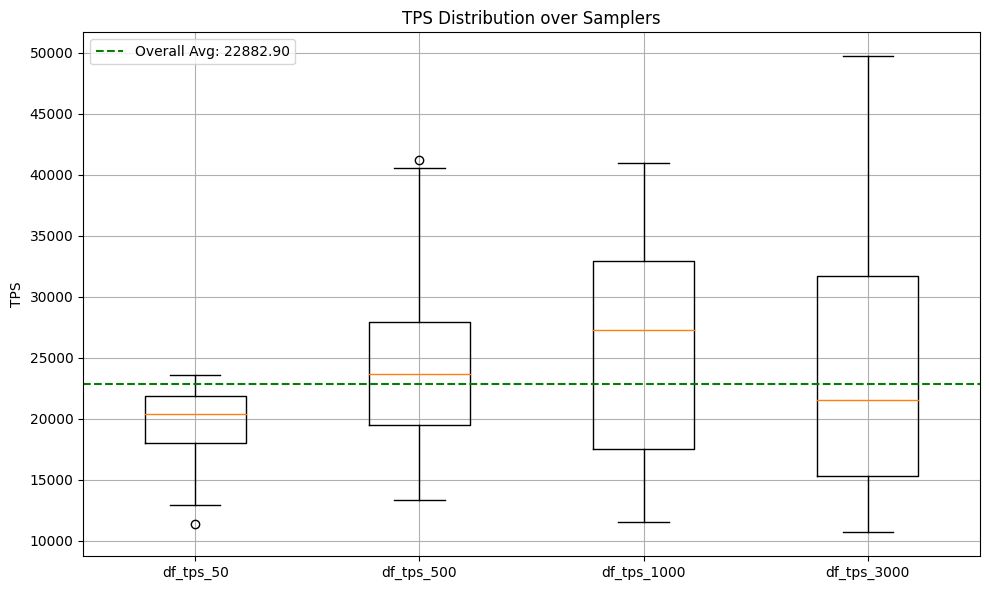

In [23]:
def plot_tps(df_list, plot_output, names):
    # Create a list to store the TPS values for each DataFrame
    tps_values_list = [df["tps"] for df in df_list]

    # Calculate overall average
    overall_sum = sum(tps.sum() for tps in tps_values_list)
    overall_count = sum(len(tps) for tps in tps_values_list)
    overall_average = overall_sum / overall_count

    # Plotting using matplotlib
    plt.figure(figsize=(10, 6))
    plt.boxplot(tps_values_list, vert=True, labels=names)
    
    plt.ylabel("TPS")
    plt.title("TPS Distribution over Samplers")

    # Annotate overall average as a horizontal dashed line
    plt.axhline(y=overall_average, color='green', linestyle='--', label=f'Overall Avg: {overall_average:.2f}')
    
    # Print describe for each sample
    for i, tps_values in enumerate(tps_values_list):
        print(f"Summary Statistics for Sample: {names[i]}")
        print(tps_values.describe())
        
        # Calculate and print total_tx and sampler_fail
        total_tx = int(tps_values.sum())
        sampler_fail = 59 - len(tps_values)
        print(f"Total tx: {total_tx}")
        print(f"Sampler failed: {sampler_fail}")
        
        print("-" * 40)
    
    # Annotate overall average value in the legend
    plt.legend()

    plt.grid(True)
    plt.tight_layout()

    plt.savefig(plot_output)

    # Show the plot
    plt.show()

# Example usage
df_list = [df_tps_50, df_tps_500, df_tps_1000, df_tps_3000]
names = ["df_tps_50", "df_tps_500", "df_tps_1000", "df_tps_3000"]
plot_tps(df_list, "output.png", names)


In [9]:
tx_count_50 = "50"
df_tps_50 = get_tps(f'./files/output_tx_{tx_count_50}.txt', f'./files/output_tx_{tx_count_50}.csv')

In [10]:
tx_count_500 = "500"
df_tps_500 = get_tps(f'./files/output_tx_{tx_count_500}.txt', f'./files/output_tx_{tx_count_500}.csv')

In [11]:
tx_count_1000 = "1000"
df_tps_1000 = get_tps(f'./files/output_tx_{tx_count_1000}.txt', f'./files/output_tx_{tx_count_1000}.csv')

In [12]:
tx_count_3000 = "3000"
df_tps_3000 = get_tps(f'./files/output_tx_{tx_count_3000}.txt', f'./files/output_tx_{tx_count_3000}.csv')

count       59.000000
mean     19240.405254
std       3310.129175
min      11385.440000
25%      17988.080000
50%      20385.540000
75%      21906.860000
max      23601.180000
Name: tps, dtype: float64


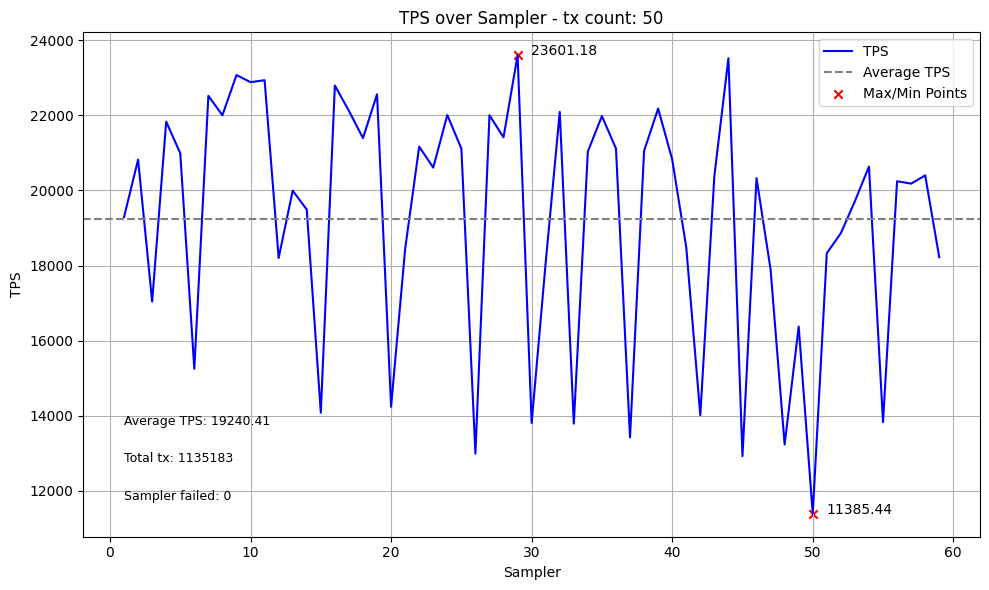

In [13]:
print_describe(df_tps_50) 
plot_tps(df_tps_50, f'./files/tps_plot_tx_{tx_count_50}.png', tx_count_50)

count       51.000000
mean     23949.460588
std       6361.155589
min      13331.670000
25%      19470.055000
50%      23674.670000
75%      27939.095000
max      41200.850000
Name: tps, dtype: float64


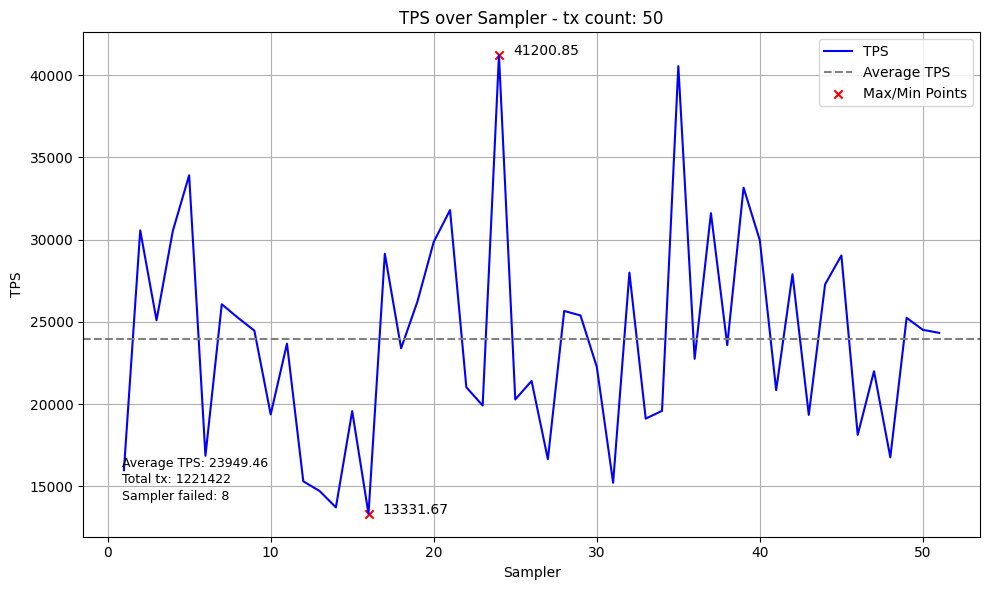

In [14]:
print_describe(df_tps_500) 
plot_tps(df_tps_500, f'./files/tps_plot_tx_{tx_count_500}.png', tx_count_50)

count       42.000000
mean     25946.657381
std       8626.864409
min      11549.980000
25%      17502.895000
50%      27291.485000
75%      32935.750000
max      40923.740000
Name: tps, dtype: float64


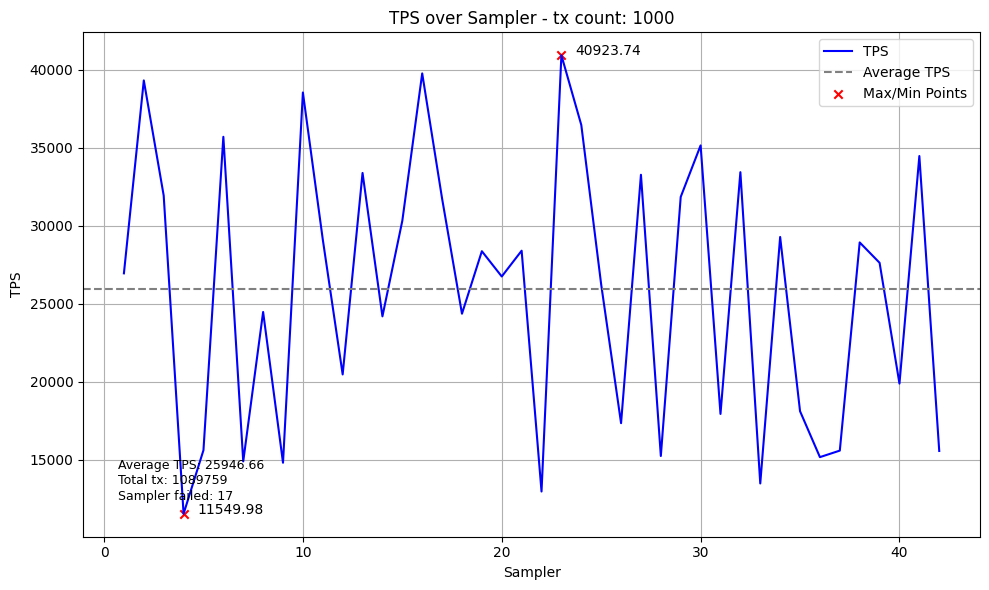

In [15]:
print_describe(df_tps_1000) 
plot_tps(df_tps_1000, f'./files/tps_plot_tx_{tx_count_1000}.png', tx_count_1000)

count       26.000000
mean     24107.300769
std      10303.443856
min      10693.840000
25%      15315.517500
50%      21572.240000
75%      31702.790000
max      49720.000000
Name: tps, dtype: float64


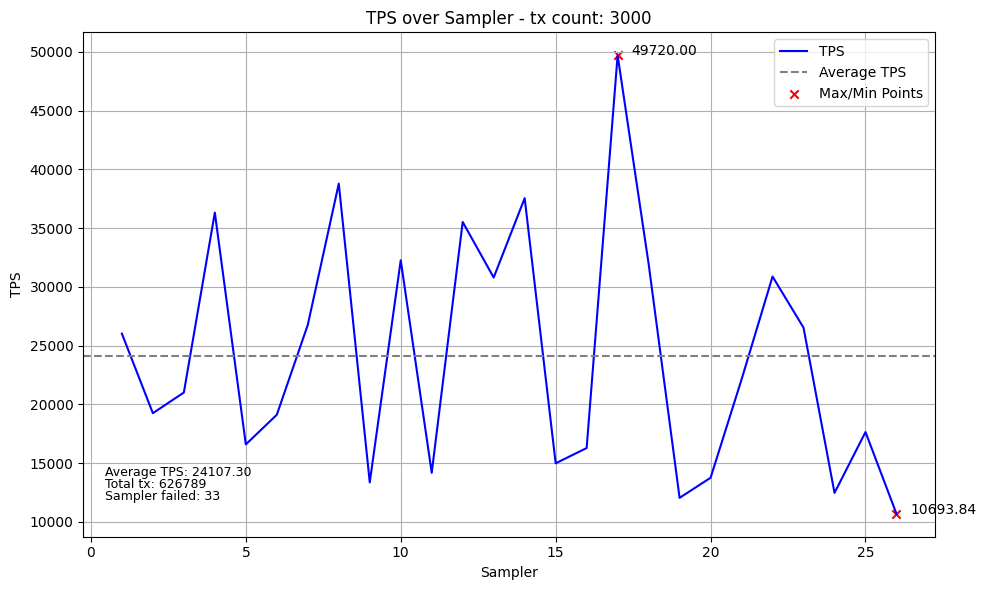

In [16]:
print_describe(df_tps_3000) 
plot_tps(df_tps_3000, f'./files/tps_plot_tx_{tx_count_3000}.png', tx_count_3000)

Summary Statistics for Sample: df_tps_50
count       59.000000
mean     19240.405254
std       3310.129175
min      11385.440000
25%      17988.080000
50%      20385.540000
75%      21906.860000
max      23601.180000
Name: tps, dtype: float64
----------------------------------------
Summary Statistics for Sample: df_tps_500
count       51.000000
mean     23949.460588
std       6361.155589
min      13331.670000
25%      19470.055000
50%      23674.670000
75%      27939.095000
max      41200.850000
Name: tps, dtype: float64
----------------------------------------
Summary Statistics for Sample: df_tps_1000
count       42.000000
mean     25946.657381
std       8626.864409
min      11549.980000
25%      17502.895000
50%      27291.485000
75%      32935.750000
max      40923.740000
Name: tps, dtype: float64
----------------------------------------
Summary Statistics for Sample: df_tps_3000
count       26.000000
mean     24107.300769
std      10303.443856
min      10693.840000
25%      15315

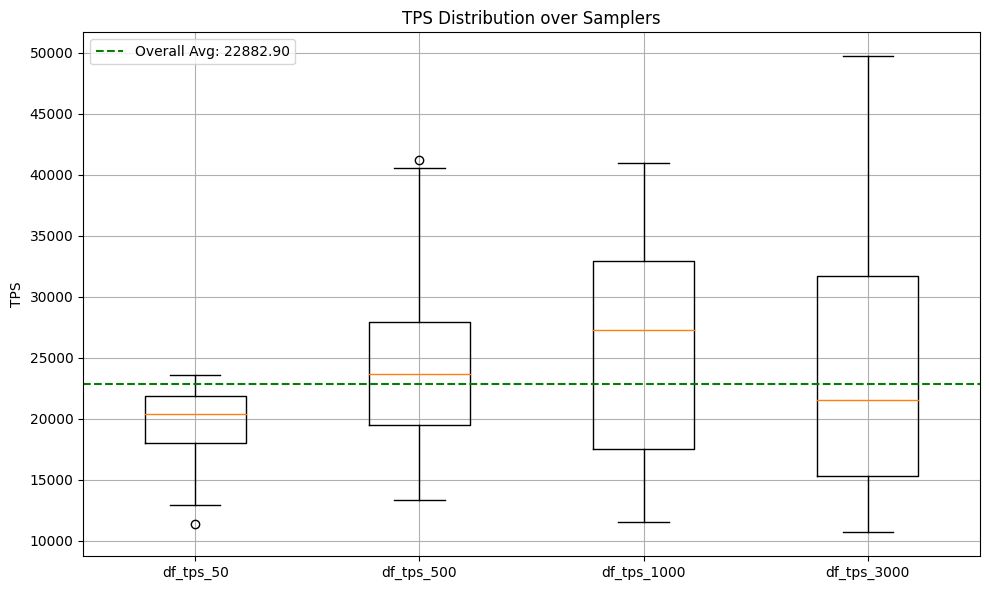

In [22]:
def plot_tps(df_list, plot_output, names):
    # Create a list to store the TPS values for each DataFrame
    tps_values_list = [df["tps"] for df in df_list]

    # Calculate overall average
    overall_sum = sum(tps.sum() for tps in tps_values_list)
    overall_count = sum(len(tps) for tps in tps_values_list)
    overall_average = overall_sum / overall_count

    # Plotting using matplotlib
    plt.figure(figsize=(10, 6))
    plt.boxplot(tps_values_list, vert=True, labels=names)
    
    plt.ylabel("TPS")
    plt.title("TPS Distribution over Samplers")

    # Annotate overall average as a horizontal dashed line
    plt.axhline(y=overall_average, color='blue', linestyle='--', label=f'Overall Avg: {overall_average:.2f}')
    
    # Print describe for each sample
    for i, tps_values in enumerate(tps_values_list):
        print(f"Summary Statistics for Sample: {names[i]}")
        print(tps_values.describe())
        print("-" * 40)
    
    # Annotate overall average value in the legend
    plt.legend()

    plt.grid(True)
    plt.tight_layout()

    plt.savefig(plot_output)

    # Show the plot
    plt.show()

# Example usage
df_list = [df_tps_50, df_tps_500, df_tps_1000, df_tps_3000]
names = ["df_tps_50", "df_tps_500", "df_tps_1000", "df_tps_3000"]
plot_tps(df_list, "output.png", names)
